# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together data points that are close to each other in a high-density region and separates out points in low-density regions as noise.

In this notebook, we apply this algorithm to two datasets, one is penguin dataset, another is tsne_scores dataset without labels.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Model 1

In this model, we apply the algorithm by choosing "bill_length_mm" and "body_mass_g" as our variables.

In [107]:
# Load dataset
df = pd.read_csv("palmer_penguins.txt")

# Remove missing values
df = df.dropna()

We need to preprocess the data by scaling it using StandardScaler.

In [108]:
# Select the features to be used for clustering
X = df[["bill_length_mm", "body_mass_g"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [109]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB
None


In [110]:
print(df.describe())

       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  333.000000      333.000000     333.000000         333.000000   
mean   172.303303       43.992793      17.164865         200.966967   
std     97.346548        5.468668       1.969235          14.015765   
min      0.000000       32.100000      13.100000         172.000000   
25%     89.000000       39.500000      15.600000         190.000000   
50%    172.000000       44.500000      17.300000         197.000000   
75%    256.000000       48.600000      18.700000         213.000000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g  
count   333.000000  
mean   4207.057057  
std     805.215802  
min    2700.000000  
25%    3550.000000  
50%    4050.000000  
75%    4775.000000  
max    6300.000000  


### Data Visualization

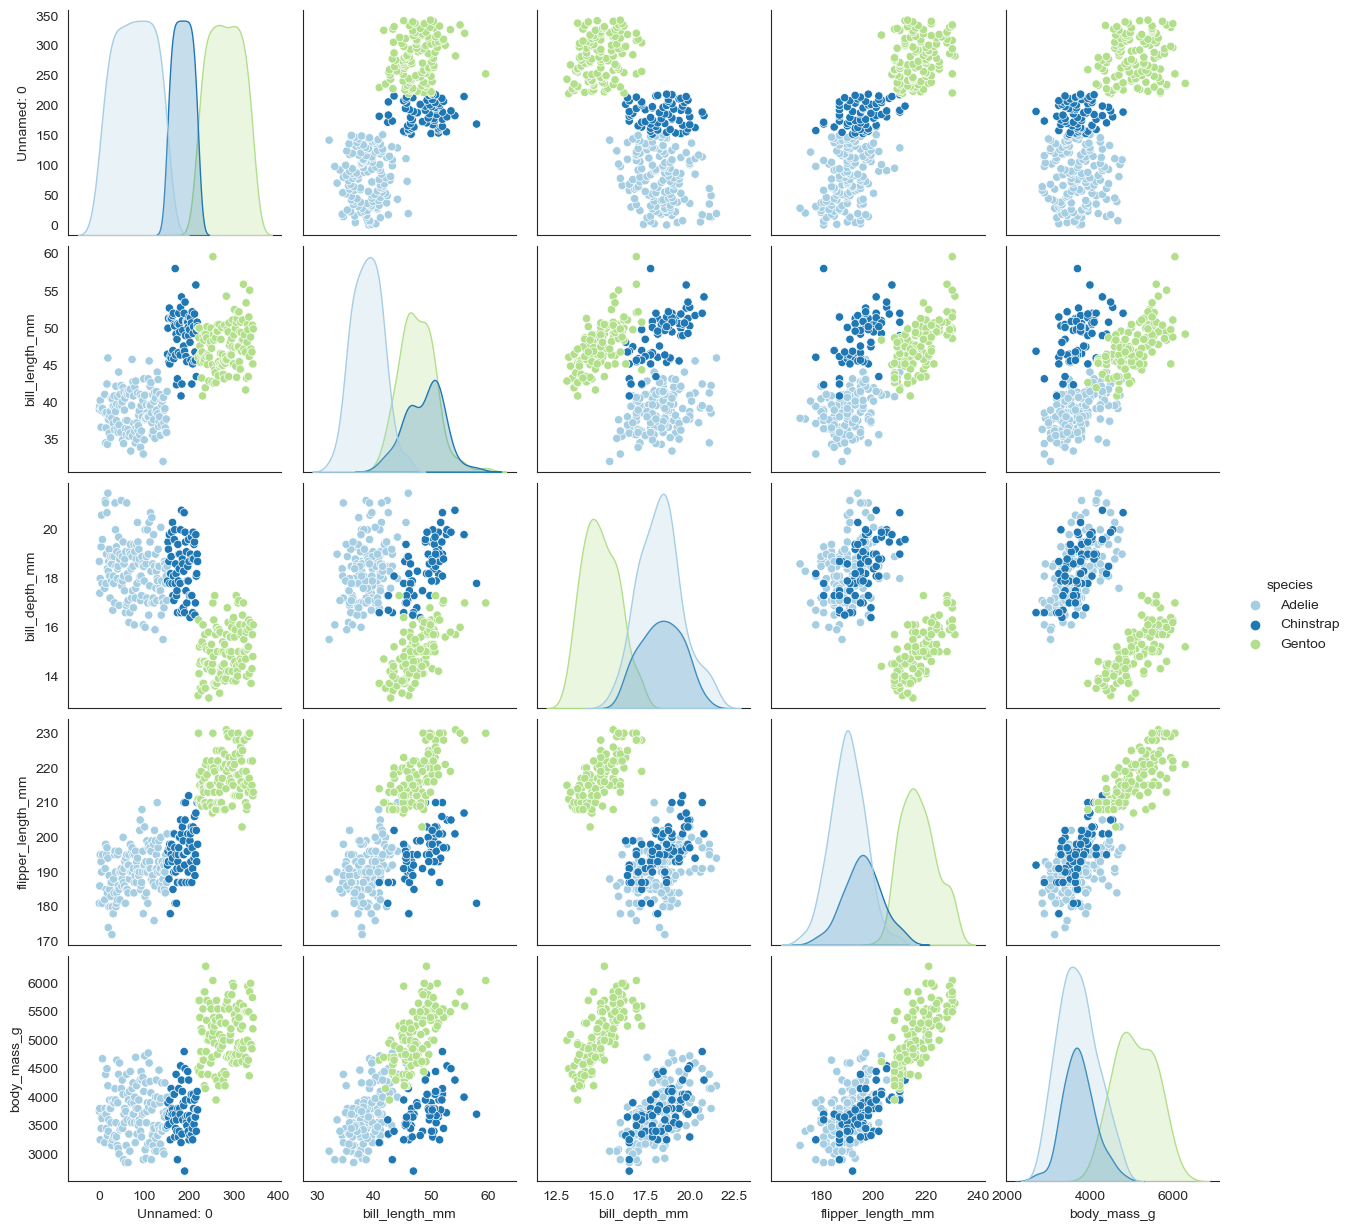

In [18]:
sns.pairplot(df, hue='species', palette='Paired')

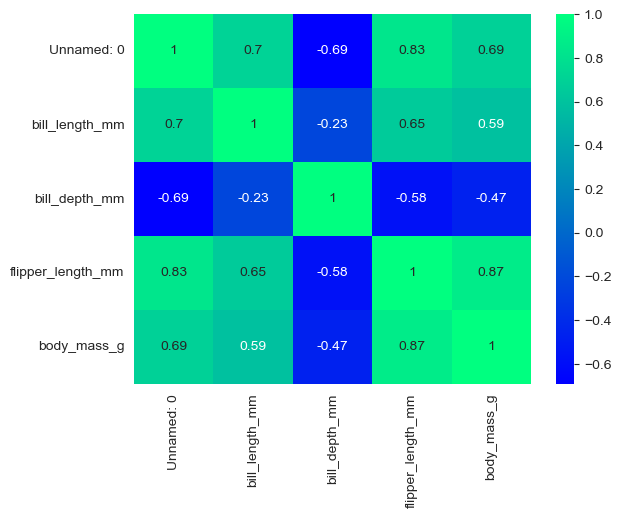

In [13]:
# Generate correlation matrix
corr_matrix = df.corr()
# Plot correlation heatmap
sns.set_style('white')
sns.heatmap(corr_matrix, annot=True, cmap='winter')
plt.show()

Now, we can apply the DBSCAN algorithm and extract the cluster labels.

In [112]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_scaled)


We can visualize the results using a scatter plot and evaluate the performance using silhouette score

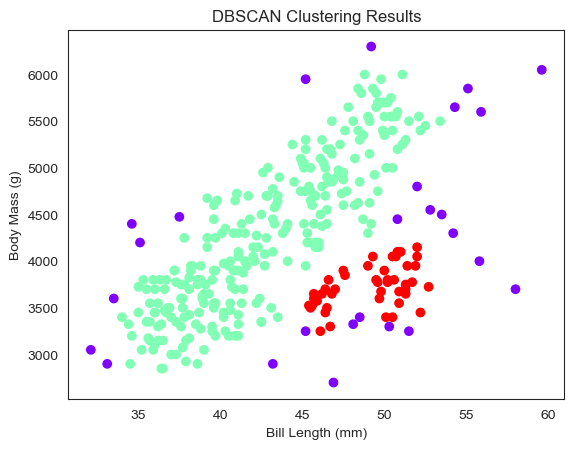

In [113]:
# Plot the clusters
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=dbscan_labels, cmap="rainbow")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("DBSCAN Clustering Results")
plt.show()

In [114]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for DBSCAN clustering
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

print("Silhouette score for DBSCAN clustering:", dbscan_silhouette)


Silhouette score for DBSCAN clustering: 0.15726238792030742


In this model, we could see the clustering accuracy is not really high this might because the algorithm is sensitive to parameters, when we make slight changes to parameters, the model will change a lot.

## Model 2

The dataset is a single-cell gene expression dataset of Arabidopsis thaliana root cells processed by a 10x genomics Cell Ranger pipeline. The dataset is preprocessed t-SNE dimensionality reduction technique. 

In [115]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
df.head(2)

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398


In [116]:
print(df.describe())

           t-SNE-1      t-SNE-2
count  4406.000000  4406.000000
mean      0.567441     1.415244
std      41.019609    35.880629
min     -84.150955   -73.312280
25%     -36.900561   -23.300937
50%      -0.768416    -3.387099
75%      32.839062    32.923441
max      87.763040    71.366740


This unlabelled dataset contains two features and 4406 rows. To identify cluster information, we will apply the DBSCAN algorithm to this dataset.

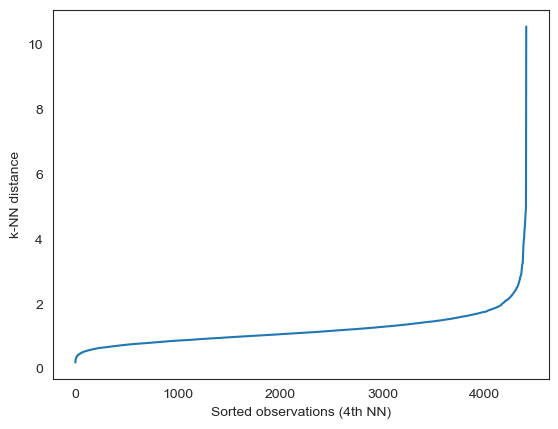

In [122]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In this KNN distance plot, we should look for the knee point to find the best $\epsilon$

In [124]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

4.5445133515748894


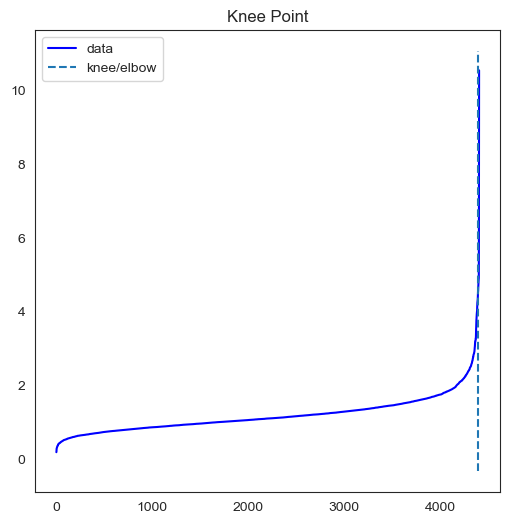

In [125]:
kneedle.plot_knee()
plt.show()

Therefore, we have found $\epsilon$ and minimum number of points. We choose $\epsilon = 4.54$ and minimum number of points as 4, then we apply them on the DBSCAN model.

In [126]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_

# check unique clusters
set(clusters.labels_)
# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [118]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 870,
         1: 1524,
         2: 769,
         3: 301,
         4: 153,
         5: 246,
         6: 232,
         7: 283,
         8: 11,
         9: 6,
         10: 8,
         -1: 3})

In [120]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

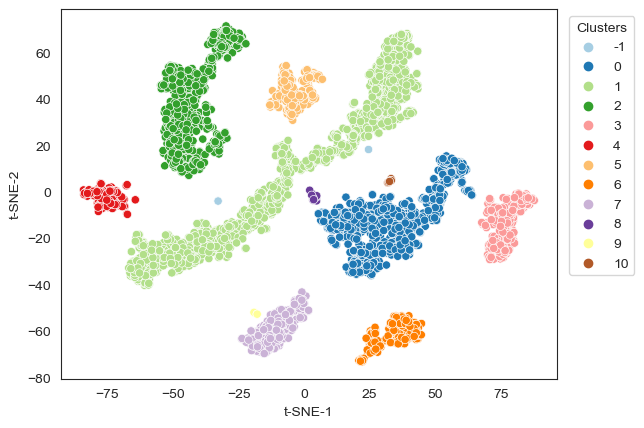

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "Paired")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

According to the plot, we could see the model has a good performance.